## What is regression to the mean?

In the simplest terms:

An extreme observation is likely to be followed by a measurement closer to the mean.

Once you understand it, the concept is simple, but there is a surprising amount of subtlety, and exceptions buried beneath the surface.

## Population and measurement variance

For regression to the mean to occur, there has to be both population and measurement variance. Also, you need some knowledge of the population distribution in order to mark an observation as extreme. To understand regression to the mean, let's consider the case of standardized test scores. In this case, there is both population and measurement variance. Individuals in the population have a tendency to score differently. Each individual will also score differently day to day. With these conditions, and assuming roughly normal distributions, regression to the mean exists.

So how would we observe it?

We can do experiments to investigate. First let's take a sample to represent our population.

In [1]:
pop <- rnorm(10000, mean=0, sd=1)


Now for each member of the population, we'll take two samples. We'll record the regression (how much closer to the population mean the second is versus the first) in each case. We'll keep track of all observations, and the instances where the first observation is extreme (half standard deviation away from mean).


In [2]:
all_arr <- c()
extreme_arr <- c()
for (mean in pop) {
    reading1 <- rnorm(1,mean=mean, sd=0.5)
    reading2 <- rnorm(1,mean=mean, sd=0.5)
    towards_0 <- abs(reading1) - abs(reading2)
    all_arr <- c(all_arr, towards_0 )
    if (abs(reading1)>0.5) {
        extreme_arr <- c(extreme_arr, towards_0)
    }
}

sprintf( 'All observation pairs, average regression = %.4f', mean(all_arr) )
sprintf( 'First observation extreme, average regression %.4f', mean(extreme_arr) )


[1] "All observation pairs, average regression = -0.0024"

[1] "First observation extreme, average regression 0.1631"

Wow that's pretty clear! So when does regression to the mean not apply? It turns out that it is the slope of the population distribution around the mean that determines regression. We can imagine distributions that don't behave nicely like normal distributions do:

In [3]:
rvdist <- function(n,spread=1,mean=0) {
    numbers <- -10:10/(10/spread) + mean
    weights <- c(10,9,8,7,6,5,4,3,2,1,0,1,2,3,4,5,6,7,8,9,10)
    probs = weights/sum(weights)
    return( sample(numbers,n,prob=probs,replace=TRUE) )
}

In [4]:
popn <- rvdist(10000)

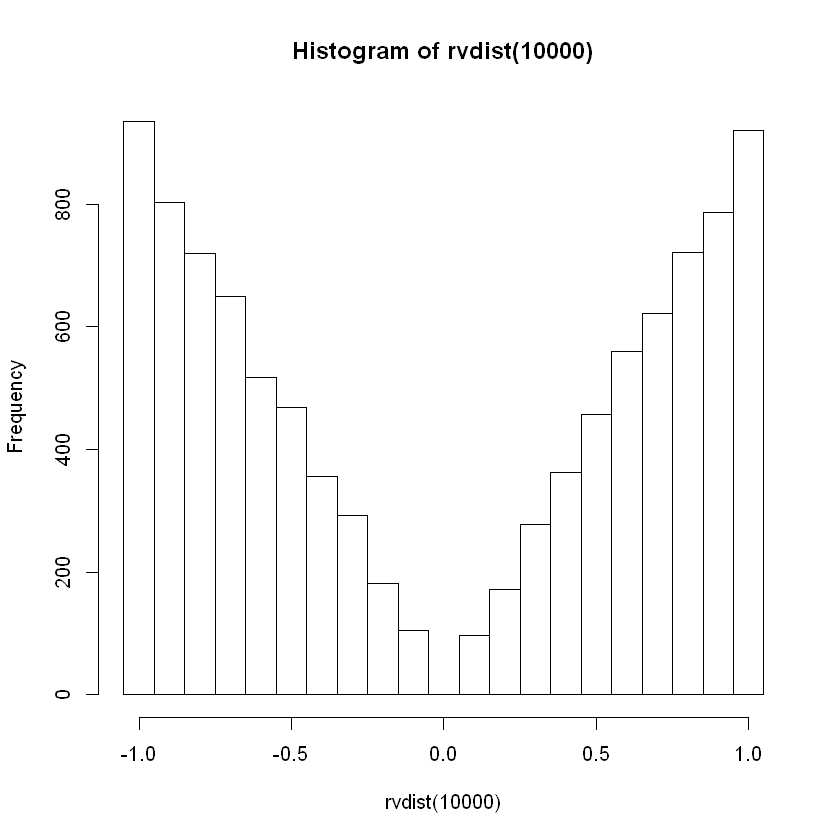

In [5]:
numbers <- -10:11/10-0.05
hist( rvdist( 10000 ), breaks=numbers )

In [6]:
towards_arr <- c()
for (mean in popn) {
    reading1 <- rnorm(1,mean=mean, sd=0.5)
    reading2 <- rnorm(1,mean=mean, sd=0.5) 
    if ( (abs(reading1)> 0.5) && (abs(reading1)<0.7) ) {
        towards_0 <- abs(reading1) - abs(reading2)
        towards_arr <- c(towards_arr, towards_0)
    }
}
sprintf('regression for first observation with extreme values between 0.5 and 0.7 = %.4f',mean(towards_arr))

[1] "regression for first observation with extreme values between 0.5 and 0.7 = -0.1457"

In this example, regression to the mean actually becomes regression away from the mean! This shows us how basic assumptions we make (like regression to the mean) depend fundamentally on well-behaved underlying population distributions.